
# 분류(Classification)

- NB(Naive Bayes) #베이즈 통계와 생성 모델에 기반
- Logistic Regression #독립변수와 종속변수 간 선형 관계성에 기반
- Decision Tree #결정트리
- SVD #개별 클래스 간 최대 분류 마진을 효과적으로 찾아주는 서포트벡터머신
- NN #심층 연결 기반 신경망(Neural Network)
- NN #Nearest Neighbor; 근접 거리를 기준으로 하는 최소 근접 알고리즘
- Ensemble #서로 다른 or 같은 머신러닝 알고리즘을 결합한 앙상블

## 1. Decision Tree(결정트리)

- 직관적인 쉬운 알고리즘.
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- if/else 방식으로 더 많은 방식으로 분류하고 싶으면 가지치기를 많이 해도 되는데, 이 경우 overfitting의 가능성이 높아짐.-예측 성능 저하로 이어짐
- ★그래서 가지치기를 하는 결정 노드의 규칙을 잘 정해야 하고 + 데이터셋을 균일하게 분할해야 함!★

#### 정보 균일도를 측정: 정보 이득 지수, 지니 계수
- 정보 이득 지수: 1- 엔트로피 지수(혼잡도) -> 값이 클수록 균일
- 지니 계수: 0과 1 사이 범위, 1로 갈수록 균일도가 높음-> 1에 가까울수록 균일

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [10]:
iris = load_iris()
X_df = iris.data
y_df = iris.target

In [27]:
#객체 (ML 모델: DecisionTree)
dt_clf = DecisionTreeClassifier(random_state=156)
 ##이 의사결정나무 모델에 아무런 파라미터 제약을 걸지 않아서 파라미터들이 전부 디폴트 값임.

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

#학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

##### 예측은 시각화: export_grahviz(estimator, output 파일 이름, y의 targetname,X의 featurename(컬럼네임))

In [12]:
#시각화 모듈: graphviz를 import해서 주피터 노트북 상에서 열어보자.
from sklearn.tree import export_graphviz

In [13]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
#dt_clf라는 모델을, 'tree.dot'으로 내보냄

##### 직접 시각화

In [14]:
import graphviz

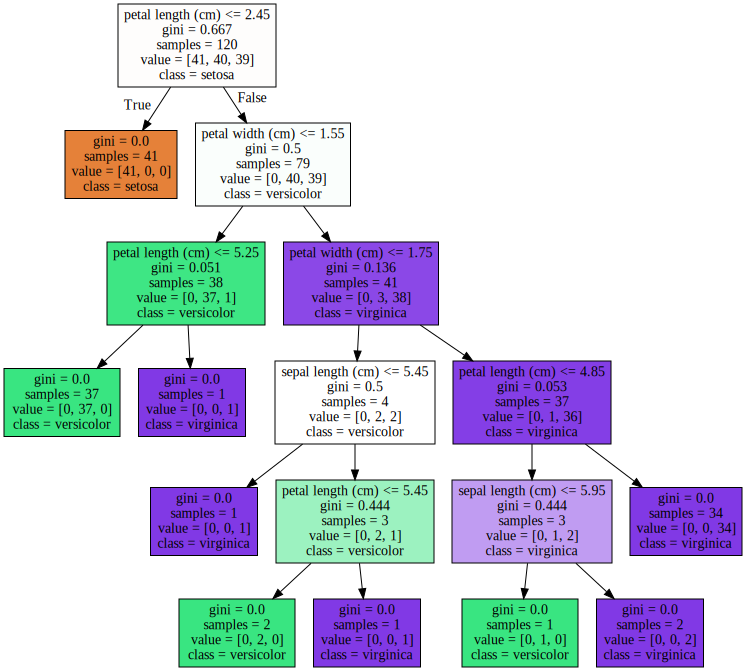

In [15]:
#앞서 만든 'tree.dot'을 Graphviz가 읽어서 주피터 노트북상에서 시각화.
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#맨 위에 조건이 없다면 leaf, 있다면 자식 노드가 있는 branch 노드
#sample: 현 규칙에 해당하는 데이터의 수, value=[a,b,c]는 각 클래스 값에 해당하는 데이터의 수
#맨 마지막의 class는 가장 대다수의 값을 의미(이 클래스로 분류될거라는 의미.)

#### 트리 ML 알고리즘의 하이퍼 파라미터 값을 바꿔보자.(과적합 방지)
- 파라미터 제약 없는 트리는 너무 세세하게 분할하게 됨->과적합 가능성이 큼

###### max_depth
- max_depth = 3 --> tree의 깊이를 바꿈.(3단)

In [17]:
#객체 (ML 모델: DecisionTree)
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
 ##이 의사결정나무 모델에 아무런 파라미터 제약을 걸지 않아서 파라미터들이 전부 디폴트 값임.

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

#학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [18]:
export_graphviz(dt_clf, out_file="tree2.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
#dt_clf라는 모델을, 'tree.dot'으로 내보냄

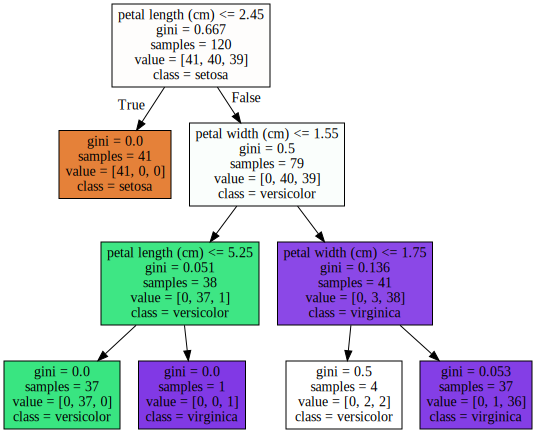

In [20]:
#앞서 만든 'tree.dot'을 Graphviz가 읽어서 주피터 노트북상에서 시각화.
with open("tree2.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- max_depth=3 설정하니까 깊이가 최대 3개만 나옴. 보면 value=[0,2,2]로 versicolor와 virginica 2개씩 있는데 그냥 vesicolor로 분류되게 됨.

###### min_samples_split :sample 개수에 유의!
- min_samples_split = 4 --> 분류되는 네모 안의 sample의 최소 숫자를 바꿈(4개)

In [21]:
#객체 (ML 모델: DecisionTree)
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 4)
 ##이 의사결정나무 모델에 아무런 파라미터 제약을 걸지 않아서 파라미터들이 전부 디폴트 값임.

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

#학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

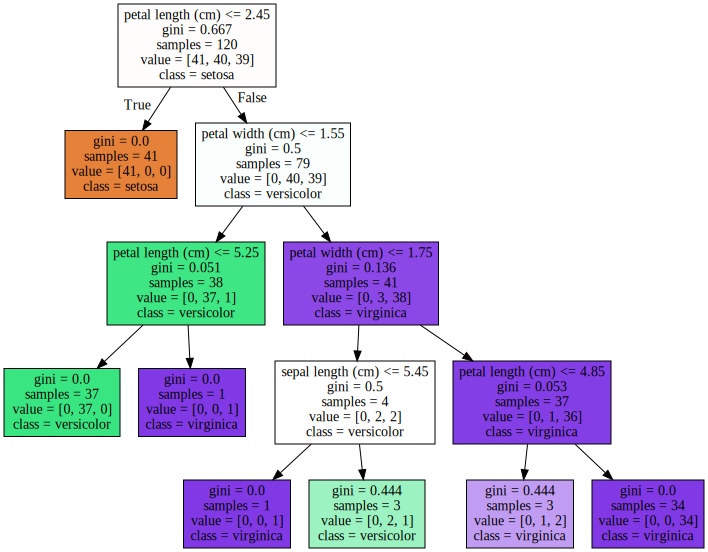

In [22]:
export_graphviz(dt_clf, out_file="tree3.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open("tree3.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- 마지막에 보면 value = [0,2,1] 이어도 더 이상 분할을 못함. 왜냐면 최소 샘플 개수가 4개는 되어야 분할하는데 3개이므로.
- 그러므로 마지막 샘플 개수가 3으로 두고 분할 정지!

###### min_samples_leaf :sample 개수에 유의!
- min_samples_leaf = 4 --> sample 개수가 4개 이하가 되면 leaf 노드가 될 수 있음.

In [23]:
#객체 (ML 모델: DecisionTree)
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf = 4)
 ##이 의사결정나무 모델에 아무런 파라미터 제약을 걸지 않아서 파라미터들이 전부 디폴트 값임.

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

#학습
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

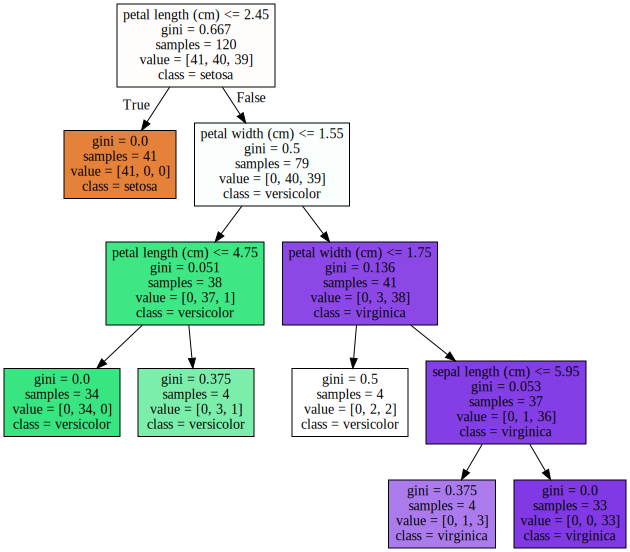

In [24]:
export_graphviz(dt_clf, out_file="tree4.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

with open("tree4.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### 모델.feature_importances_ : 피처별 중요도 값 제공

In [25]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [28]:
#feature importance 추출
np.round(dt_clf.feature_importances_,3) #피처 4개별 각각의 중요도(보기 불편하므로 밑의 코드 이용)

array([0.025, 0.   , 0.555, 0.42 ])

In [30]:
#각 feature별 importance 매핑(어떤 피처에 중요도 얼마인지?)
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.2f}'.format(name, value))

sepal length (cm): 0.03
sepal width (cm): 0.00
petal length (cm): 0.55
petal width (cm): 0.42


In [31]:
#각 feature별 importance 매핑(어떤 피처에 중요도 얼마인지?)
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


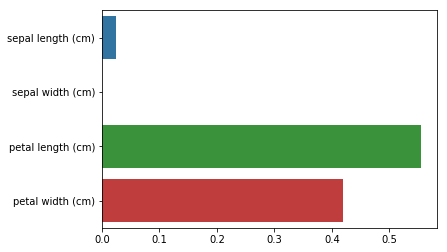

In [29]:
#시각화
sns.barplot(dt_clf.feature_importances_, iris.feature_names) #가장 중요도가 높은 피처는 petal length군.

#### 결정 트리 과적합(overfitting): 시각화로 알아보자!

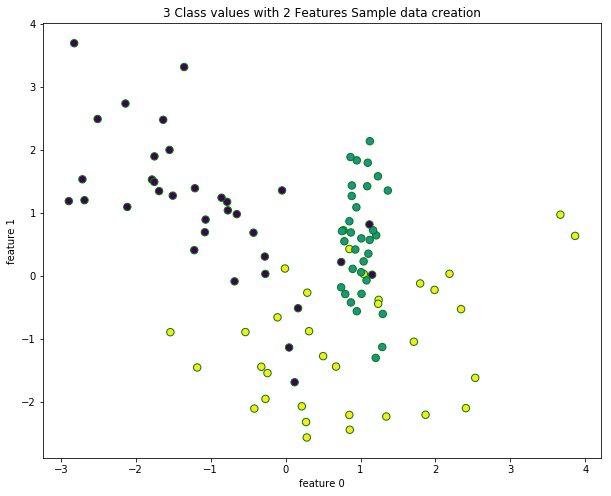

In [45]:
#make_classification 모듈 사용: 사이킷런에서 제공하는, 분류를 위한 테스트용 데이터를 쉽게 만들어주는 모듈.

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

#2차원 시각화를 위해, 피처는 2개+클래스는 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#시각화
plt.figure(figsize=(10,8))
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=55, edgecolor='g') 
#marker:원모양, c:color, s:marker size, edgecolor=r(red),b(blue),g(green),k(black) //c=y_labels로 했으므로 클래스가 3개이므로 3개 색으로 나옴.
plt.title("3 Class values with 2 Features Sample data creation")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

- 이렇게 생긴 분류 데이터셋에 결정 트리를 적용하여 분류해보자.

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels) #시각화하려면 별도의 visualize_boundary() 함수(참고만)

In [47]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


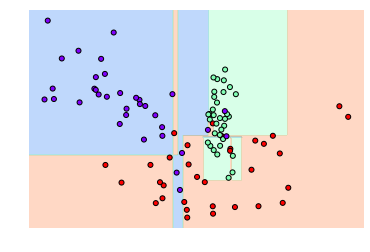

In [48]:
visualize_boundary(dt_clf, X_features, y_labels)
#이상치때문에 과적합 일어남 -> 분류 경계가 많아짐.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


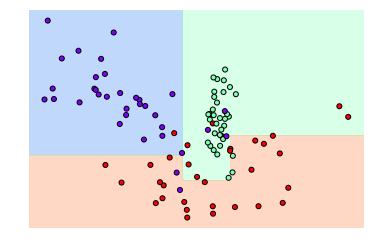

In [49]:
#과적합 줄이기 ->파라미터 제약(min_samples_leaf = 6)
dt_clf2=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf2, X_features, y_labels)

#### 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- features.txt를 df형태로 받아와서 list 저장-> 나중에 X df의 컬럼명으로 사용

In [3]:
#features.txt :피처 인덱스와 피처명
feature_df = pd.read_csv('04/human_activity/features.txt', sep='\s+', header=None, names=['col_index','col_name'])
feature_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
#col_index 제거, col_name만 리스트로 만들기 :feature_name
feature_name = feature_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

- 여기서의 데이터셋은 이미 train/test가 친절하게 나뉘어져 있다.

In [6]:
#X_train,test와 y_train,test 로드

X_train = pd.read_csv('04/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
X_test = pd.read_csv('04/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

y_train = pd.read_csv('04/human_activity/train/y_train.txt', sep='\s+', names=['action'])
y_test = pd.read_csv('04/human_activity/test/y_test.txt', sep='\s+', names=['action'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [7]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
X_train.info() #컬럼이 561개로 어마어마함.. 대신 전부 숫자형(float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [12]:
#레이블이 불균형한가?
y_train['action'].value_counts() #ㄴㄴ

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

- 결정트리 모델 만들어서 예측성능 점검해보자.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
#객체: 디폴트로만 생성
dt_clf = DecisionTreeClassifier(random_state=156)
#학습
dt_clf.fit(X_train,y_train)
#예측
pred = dt_clf.predict(X_test)
#평가
acc = accuracy_score(y_test, pred)
print('예측 정확도: {0:.3f}'.format(acc))

예측 정확도: 0.855


In [15]:
#결정트리 ML 모델의 기본 하이퍼 파라미터 추출
dt_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 156,
 'splitter': 'best'}

- 하이퍼 파라미터를 건드려서 과적합을 제어하고 더 높은 정확도가 나올 수 있는지 알아보자.
- GridSearchCV :교차검증, 평가 + 최적의 하이퍼 파라미터 추출까지 한번에!

In [20]:
from sklearn.model_selection import GridSearchCV

###### max_depth

In [21]:
params = {'max_depth':[6,8,10,12,16,20,24]} #파라미터는 딕셔너리 형태로

grid_dtree = GridSearchCV(dt_clf, params, scoring='accuracy', cv = 5, refit=True, verbose=1)

In [23]:
#학습
grid_dtree.fit(X_train, y_train)
#결과(k-fold의 결과!)
print('최적의 하이퍼 파라미터: ', grid_dtree.best_params_)
print('최적의 하이퍼 파라미터의 스코어 : {0:.3f}'.format(grid_dtree.best_score_)) #앞에서 scoring을 accuracy로만 해서 정확도 값만 추출.

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.9min finished


최적의 하이퍼 파라미터:  {'max_depth': 8}
최적의 하이퍼 파라미터의 스코어 : 0.853


In [24]:
#결과값 더 자세하게
new_df = pd.DataFrame(grid_dtree.cv_results_)
new_df[['param_max_depth', 'mean_test_score', 'mean_train_score']] #여기서의 train/test score(정확도)는 train셋만 넣었을때 cv한 값. (즉, train셋을 train/test분할해서 나온 값)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850925,0.944848
1,8,0.852557,0.982693
2,10,0.850925,0.993403
3,12,0.844124,0.997212
4,16,0.852149,0.999660
5,20,0.851605,0.999966
6,24,0.850245,1.000000


In [26]:
#new_df.columns

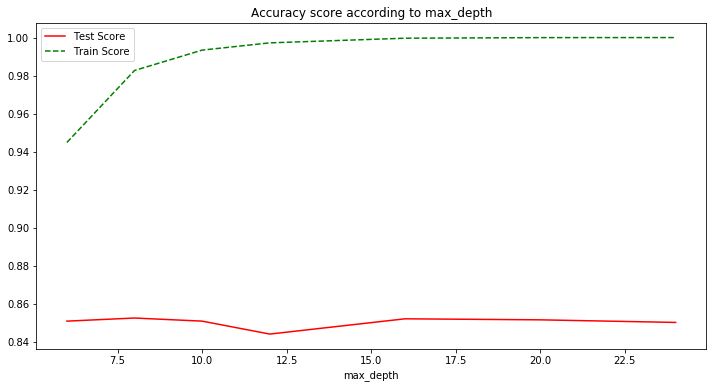

In [36]:
#시각화
plt.figure(figsize=(12,6))
plt.plot(new_df['param_max_depth'], new_df['mean_test_score'], label='Test Score', linestyle='-',color='r')
plt.plot(new_df['param_max_depth'], new_df['mean_train_score'], label='Train Score', linestyle='--',color='g')
plt.xlabel('max_depth')
plt.title('Accuracy score according to max_depth')
plt.legend()
plt.show() #max_depth가 커질수록 train_score는 언제나 커짐. 가장 많아지면 거의 정확도가 1에 육박
#그러나 정작 중요한 test_score는 그저그럼. 우리는 train_score가 큰 것은 아무짝에도 쓸모가 없음.

In [37]:
#이미 앞에서 나눠놓은 train,test셋 이용해서 성능측정
max_depths = [6,8,10,12,16,20,24]

for d in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = d, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print('max_depth={0} 정확도:{1:.3f}'.format(d, acc)) #가장 좋은 것은 역시 max_depth=8일 떄

max_depth=6 정확도:0.856
max_depth=8 정확도:0.871
max_depth=10 정확도:0.867
max_depth=12 정확도:0.865
max_depth=16 정확도:0.857
max_depth=20 정확도:0.855
max_depth=24 정확도:0.855


##### max_depth,min_samples_split

In [38]:
params = {'max_depth':[8,12,16,20], 'min_samples_split':[16,24]} #파라미터는 딕셔너리 형태로
dt_clf = DecisionTreeClassifier()

grid_dtree2 = GridSearchCV(dt_clf, params, scoring='accuracy', cv = 5, refit=True, verbose=1)

In [39]:
#학습
grid_dtree2.fit(X_train, y_train)
#결과
print('최적의 하이퍼 파라미터: ', grid_dtree2.best_params_)
print('최적의 하이퍼 파라미터의 스코어 : {0:.3f}'.format(grid_dtree2.best_score_)) #앞에서 scoring을 accuracy로만 해서 정확도 값만 추출.

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.2min finished


최적의 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}
최적의 하이퍼 파라미터의 스코어 : 0.855


- 최종 만들어진 결정 트리 모델

In [40]:
#예측
estimator = grid_dtree2.best_estimator_ #refit=True이므로 자동으로 최적의 파라미터로 재학습
pred = estimator.predict(X_test)
#평가
round(accuracy_score(y_test, pred),3)

0.873

##### 각 피처의 중요도: 모델.feature_importances_ -> 시각화

In [47]:
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [49]:
ftr_import_values = estimator.feature_importances_ #피처가 너무 많아,, array 반환이라 가공 필요-> seaborn barplot

#barplot 변환을 쉽게 하기 위해 series 변환
ftr_import = pd.Series(ftr_import_values, index = X_train.columns) #index는 feature_name(list)이므로 그냥 X_train.columns(index)사용
ftr_import[:5]

tBodyAcc-mean()-X    0.0
tBodyAcc-mean()-Y    0.0
tBodyAcc-mean()-Z    0.0
tBodyAcc-std()-X     0.0
tBodyAcc-std()-Y     0.0
dtype: float64

In [52]:
#series 정렬->  df.sort_values()
ftr_top20 = ftr_import.sort_values(ascending=False)[:20] #내림차순
ftr_top20

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,24    0.214038
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101548
fBodyGyro-maxInds-X                0.023971
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAcc-energy()-Y             0.016433
tBodyAccMag-arCoeff()1             0.015741
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tBodyAcc-correlation()-X,Y         0.006710
tGravityAcc-max()-Y                0.006290
tGravityAcc-min()-Y                0.006114
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
tGravityAcc-max()-Z                0.002987
dtype: float64

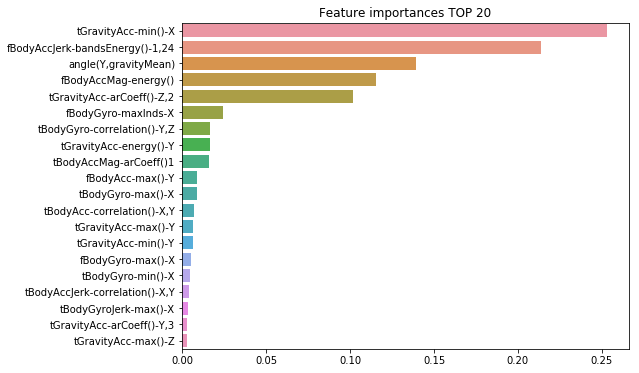

In [55]:
#barplot 시각화
plt.figure(figsize=(8,6))
sns.barplot(ftr_top20,ftr_top20.index) #x축: 값, y축: 인덱스
plt.title('Feature importances TOP 20')
plt.show()

#### 결정 트리 시각화: graphviz

In [58]:
#시각화 모듈: graphviz를 import해서 주피터 노트북 상에서 열어보자.
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(estimator, out_file="dtree.dot",  feature_names=feature_name, impurity=True, filled=True)
#dt_clf라는 모델을, 'tree.dot'으로 내보냄

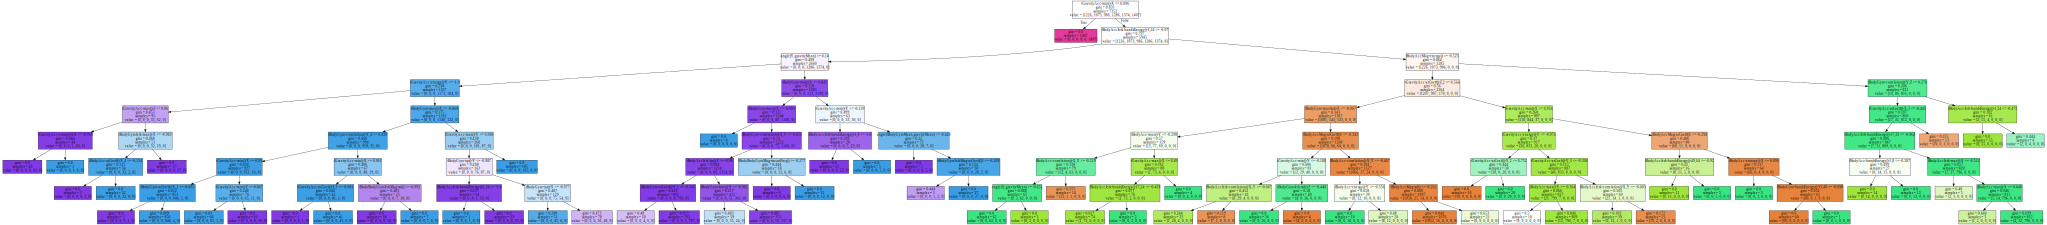

In [63]:
#앞서 만든 'tree.dot'을 Graphviz가 읽어서 주피터 노트북상에서 시각화.
with open("dtree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#맨 위에 조건이 없다면 leaf, 있다면 자식 노드가 있는 branch 노드
#sample: 현 규칙에 해당하는 데이터의 수, value=[a,b,c]는 각 클래스 값에 해당하는 데이터의 수
#맨 마지막의 class는 가장 대다수의 값을 의미(이 클래스로 분류될거라는 의미.)